# Clustering Jerárquico

El clustering jerárquico es un método de agrupamiento que busca organizar los datos en grupos o clusters de manera jerárquica, formando una estructura de árbol o dendrograma. En lugar de asignar los datos directamente a un número fijo de clusters como en el caso del clustering k-means, el clustering jerárquico construye una estructura de clusters anidados, donde cada cluster puede contener subclusters más pequeños.

Existen dos enfoques principales en el clustering jerárquico: el aglomerativo y el divisivo.

* En el enfoque aglomerativo, cada muestra se trata inicialmente como un cluster individual y luego se van fusionando los clusters más similares en cada paso hasta obtener un único cluster que contiene todas las muestras. En este proceso, se construye un dendrograma que muestra la relación de similitud entre los clusters y las muestras.

* En el enfoque divisivo, se parte de un único cluster que contiene todas las muestras y luego se van dividiendo en subclusters más pequeños en cada paso hasta que cada muestra se encuentre en su propio cluster individual. Este enfoque es menos común y más costoso computacionalmente.

El clustering jerárquico puede ser representado visualmente mediante un dendrograma, que muestra las fusiones de clusters y las distancias entre ellos. El dendrograma permite identificar la estructura jerárquica y facilita la interpretación de los resultados del clustering.

Una ventaja del clustering jerárquico es que no requiere especificar previamente el número de clusters. Además, puede ser útil cuando se desea explorar diferentes niveles de granularidad en la estructura de clusters.

En resumen, el clustering jerárquico es un método de agrupamiento que organiza los datos en una estructura jerárquica de clusters, fusionando o dividiendo los clusters en cada paso.

In [ ]:
#importamos paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
import seaborn as sns


In [ ]:
# Cargar el conjunto de datos
path = '/home/Destinatarios_clustering.xlsx'
columnas_deseadas = ['IngresoAnual', 'TotalHijos', 'CantHijosEnCasa', 'CantAutomoviles', 'Edad']
data = pd.read_excel(path, usecols=columnas_deseadas)


# Convertir los datos en un DataFrame de pandas
df = pd.DataFrame(data=data)
df


,IngresoAnual,TotalHijos,CantHijosEnCasa,CantAutomoviles,Edad
0,160000,4,5,4,42
1,150000,0,5,4,41
2,130000,0,0,3,55
3,130000,4,5,1,58
4,130000,0,1,3,53
...,...,...,...,...,...
404,10000,2,2,1,45
405,10000,0,0,1,33
406,10000,2,0,1,58
407,10000,3,3,1,45


In [ ]:
#df = df[["Horas de trabajo promedio [hs/año]"]]

In [ ]:
df.describe()

,IngresoAnual,TotalHijos,CantHijosEnCasa,CantAutomoviles,Edad
count,409.000000,409.000000,409.000000,409.000000,409.000000
mean,52518.337408,1.063570,0.650367,1.088020,47.479218
std,30240.300360,1.180258,1.342191,1.071959,9.880173
min,10000.000000,0.000000,0.000000,0.000000,32.000000
25%,30000.000000,0.000000,0.000000,0.000000,41.000000
50%,40000.000000,1.000000,0.000000,1.000000,46.000000
75%,70000.000000,2.000000,1.000000,2.000000,53.000000
max,160000.000000,5.000000,5.000000,4.000000,96.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Estandarizar la matriz de enlace Z utilizando StandardScaler
scaler = StandardScaler()
df_Z = scaler.fit_transform(df)

In [ ]:
# Imprimir las primeras filas del conjunto de datos
print(df.head())

   IngresoAnual  TotalHijos  CantHijosEnCasa  CantAutomoviles  Edad
0        160000           4                5                4    42
1        150000           0                5                4    41
2        130000           0                0                3    55
3        130000           4                5                1    58
4        130000           0                1                3    53


In [ ]:
df_Z = pd.DataFrame(df_Z)

La función linkage() es parte de la biblioteca scipy.cluster.hierarchy y se utiliza para calcular las distancias y fusiones entre los clusters en el clustering jerárquico.

Parámetros de la función linkage():

-**y:** Los datos de entrada. Puede ser una matriz 2D o una matriz de distancia precalculada.
-**method:** El método de enlace a utilizar. Puede ser uno de los siguientes valores:
  1- 'single': Utiliza la distancia mínima entre los puntos de los clusters.
  2- 'complete': Utiliza la distancia máxima entre los puntos de los clusters.
  3- 'average': Utiliza la distancia promedio entre los puntos de los clusters.
  4- 'centroid': Utiliza la distancia entre los centroides de los clusters.
  5- 'ward': Utiliza el método de Ward para minimizar la suma de las diferencias cuadradas dentro de los clusters.

In [ ]:
# Realizar clustering jerárquico utilizando enlace completo (complete linkage)

Z = linkage(df_Z, 'centroid')


In [ ]:
Z

array([[ 15.        ,  17.        ,   0.        ,   2.        ],
       [256.        , 319.        ,   0.        ,   2.        ],
       [128.        , 146.        ,   0.        ,   2.        ],
       ...,
       [812.        , 813.        ,   3.40276205, 389.        ],
       [  0.        , 791.        ,   3.83114163,  20.        ],
       [814.        , 815.        ,   4.73497851, 409.        ]])

Cada fila de la matriz representa una fusión entre dos clusters o puntos de datos.La primera fila indica que se unieron las observaciones 0 con la 17, con una distancia de 0 y obtuvimos un cluster de 2 elementos.
La segunda fila indica que se unieron los puntos 5 con el 16, con una distancia de 0 y obtuvimos un cluster de 2 elementos.
La tercera fila indica que se unieron los clusters 1 y 12, con una distancia de 0.1211 obtuvimos un cluster de 2 elementos.
Etc.

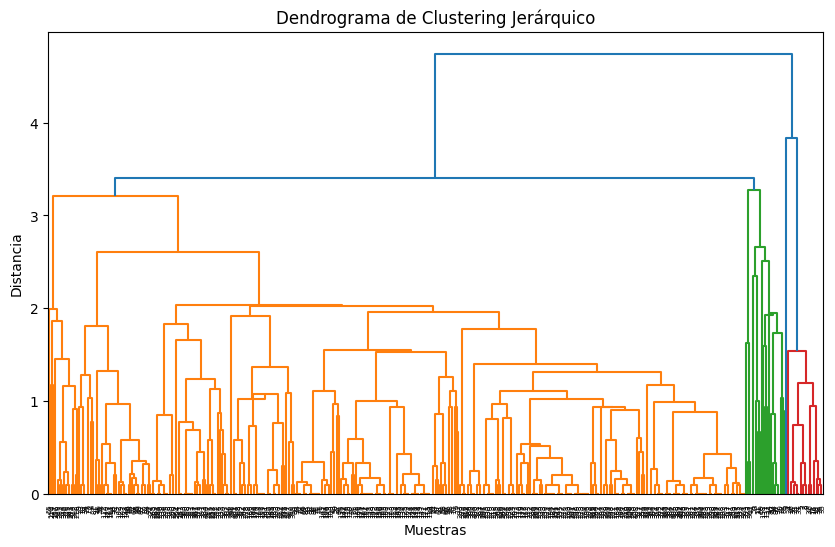

In [ ]:
# Crear un dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()


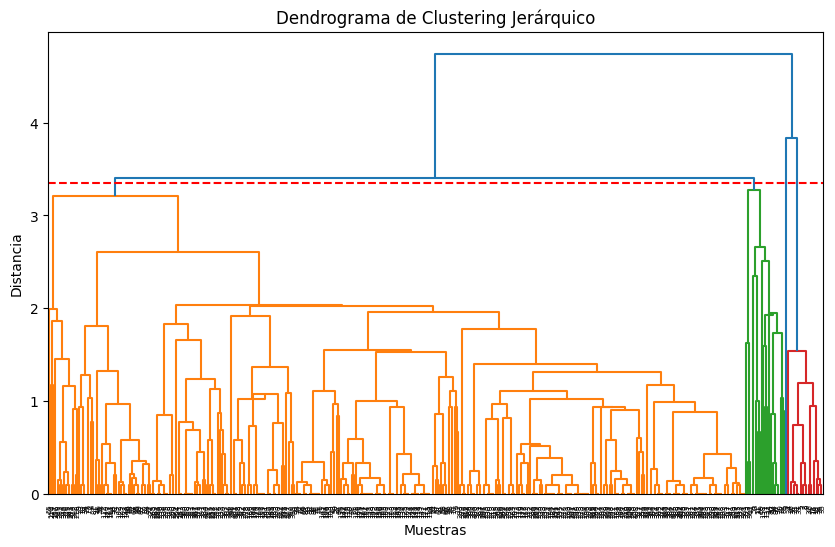

In [ ]:
# Crear un dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.axhline(y=3.35, color='r', linestyle='--')
plt.show()

In [ ]:
clusters = fcluster(Z, t=3.35, criterion='distance')
clusters

array([4, 3, 1, 2, 1, 3, 1, 3, 3, 3, 1, 2, 1, 3, 2, 1, 3, 1, 1, 3, 2, 3,
       2, 1, 3, 3, 3, 1, 1, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
df['Clustering Jerarquico'] = clusters
df

,IngresoAnual,TotalHijos,CantHijosEnCasa,CantAutomoviles,Edad,Clustering Jerarquico
0,160000,4,5,4,42,4
1,150000,0,5,4,41,3
2,130000,0,0,3,55,1
3,130000,4,5,1,58,2
4,130000,0,1,3,53,1
...,...,...,...,...,...,...
404,10000,2,2,1,45,1
405,10000,0,0,1,33,1
406,10000,2,0,1,58,1
407,10000,3,3,1,45,1


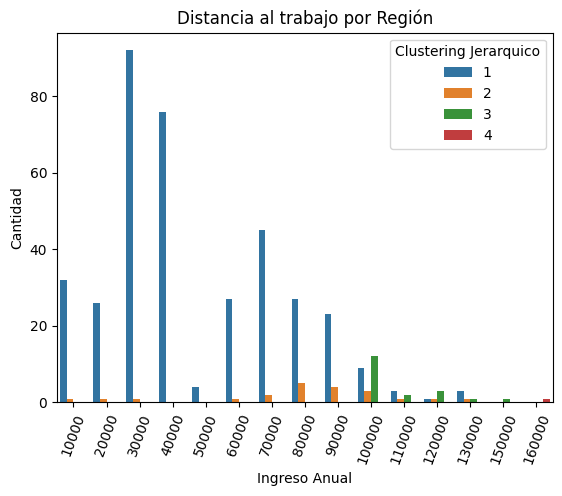

In [ ]:
sns.countplot(data=df, x="IngresoAnual", hue="Clustering Jerarquico")
plt.xlabel("Ingreso Anual")
plt.ylabel("Cantidad")
plt.title("Ingreso anual")
plt.xticks(rotation=70)
plt.show()

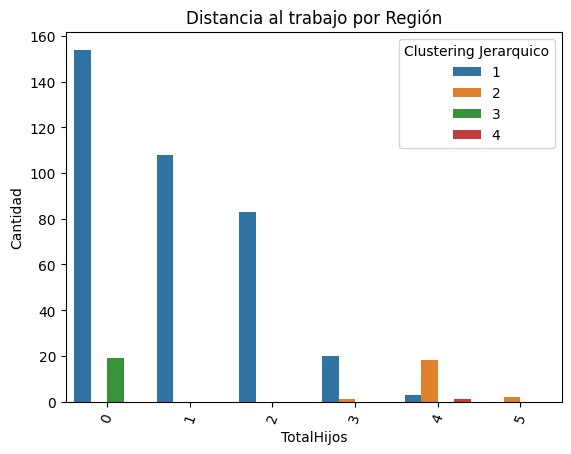

In [ ]:
sns.countplot(data=df, x="TotalHijos", hue="Clustering Jerarquico")
plt.xlabel("TotalHijos")
plt.ylabel("Cantidad")
plt.title("Total de hijos")
plt.xticks(rotation=70)
plt.show()

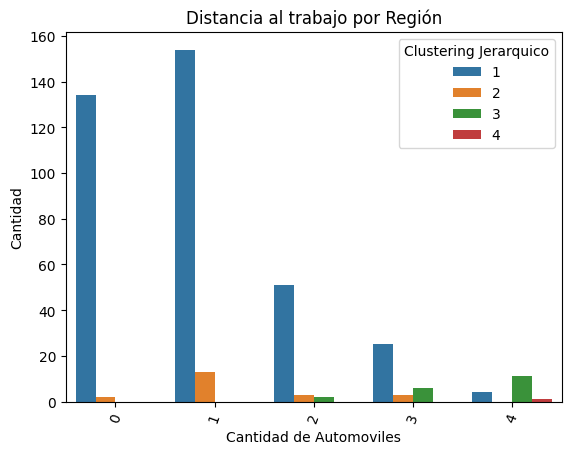

In [ ]:
sns.countplot(data=df, x="CantAutomoviles", hue="Clustering Jerarquico")
plt.xlabel("Cantidad de Automoviles")
plt.ylabel("Cantidad")
plt.title("Cantidad de autos")
plt.xticks(rotation=70)
plt.show()

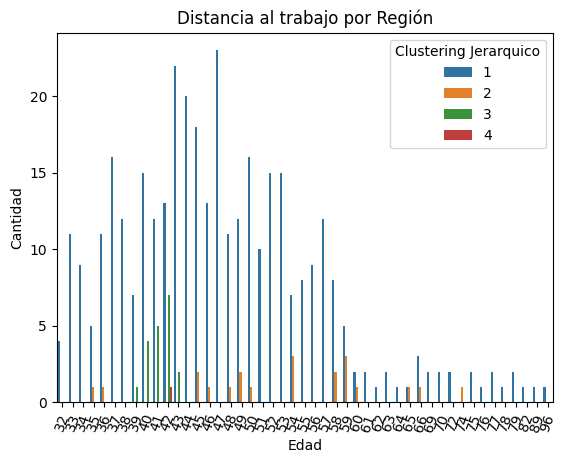

In [ ]:
sns.countplot(data=df, x="Edad", hue="Clustering Jerarquico")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.title("Distancia al trabajo por Región")
plt.xticks(rotation=70)
plt.show()